In [ ]:
import pandas as pd

df = pd.read_excel(r"TaskDataVar1.xls", header=None)
df.columns = ["X", "Y"]
df

,X,Y
0,-6.283185,0.725544
1,-6.281929,0.571549
2,-6.280672,0.735453
3,-6.279415,0.571197
4,-6.278158,0.589278
...,...,...
9995,6.278158,0.989770
9996,6.279415,0.830957
9997,6.280672,0.968028
9998,6.281929,0.838504


In [2]:
for i in df.columns:
    print(df[i].isna().sum())

0
0


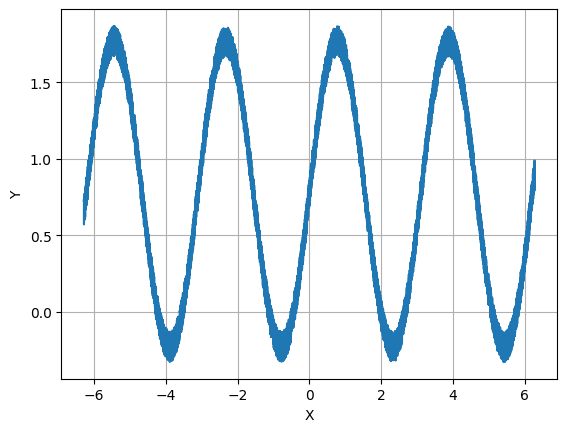

In [3]:
import matplotlib.pyplot as plt

plt.plot(df["X"], df["Y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

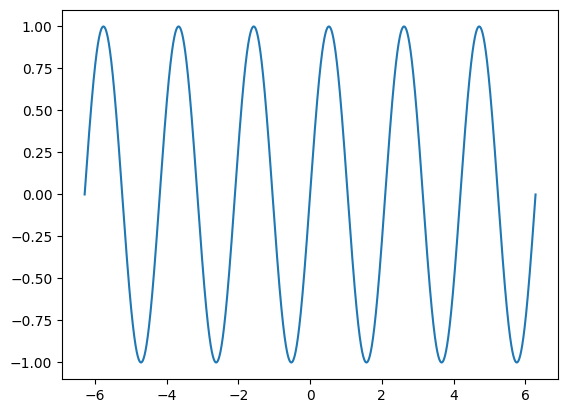

In [4]:
import numpy as np

plt.plot(df["X"], np.sin(df["X"]*3))

In [5]:
def model(x, a, b):
    return np.sin(x*b) * a

In [6]:
from scipy.optimize import minimize
import numpy as np

# ============ ОПРЕДЕЛЕНИЕ ОШИБКИ ============
def error_function(params, x, y):
    a, b = params
    # model_values = model(x, a, b)
    
    # Квадратичная ошибка
    error = sum((y - model(x, a, b))**2)
    
    # Или абсолютная ошибка
    # error = np.sum(np.abs(sales - model_values))
    
    return error

# ============ МИНИМИЗАЦИЯ ============
# init_guess = [90, 300]
# init_guess = [df["X"].min(), df["Y"].max()]
# init_guess = [df["X"].min(), df["Y"].max()]
# init_guess = [0.1, 0.01]

init_guess = [0, 3]

def model(x, a, b):
    return np.sin(x*a) + b

result = minimize(
    error_function, 
    x0=init_guess, 
    args=(df["X"].to_numpy(), df["Y"].to_numpy()),
    method='BFGS',  # Метод градиентного спуска,
)

"""
**Методы оптимизации в minimize:**

| Метод | Когда использовать |
|-------|-------------------|
| `'BFGS'` | Универсальный, хорош для гладких функций |
| `'Nelder-Mead'` | Не требует градиентов, медленнее |
| `'Powell'` | Хорош для функций с шумом |
| `'L-BFGS-B'` | Если нужны ограничения на параметры |
"""

a1, b1 = result.x
print(f"Найденные параметры: {result.x}")
print(f"Минимальная ошибка: {result.fun}")

Найденные параметры: [0.68336211 0.76975023]
Минимальная ошибка: 7961.392095929067


In [7]:
import numpy as np

def model(x, a, b):
    return np.sin(x*a) + b

# Диапазон параметров
a_values = np.linspace(2.01, 2.1, 200)
b_values = np.linspace(0.7, 0.78, 200)
best_error = float('inf')
best_a = None
best_b = None
from tqdm import tqdm
for a in tqdm(a_values):
    for b in b_values:
        error = sum(((y_i - model(x_i, a, b))**2) for x_i, y_i in zip(df["X"].to_numpy(), df["Y"].to_numpy()))
        if error < best_error:
            best_error = error
            best_a = a
            best_b = b

print(f"Лучший параметр: {best_a} {best_b} {best_error}")

100%|██████████| 200/200 [06:56<00:00,  2.08s/it]

Лучший параметр: 2.0222110552763817 0.7699497487437186 33.399767244807954


In [8]:
33.40 - best_error, 33.40 - best_error < 0.02

(np.float64(0.00023275519204446482), np.True_)

In [9]:
from scipy.optimize import curve_fit

def model(x, a, b):
    return np.sin(x*a) + b

init_guess = [2, 0.7]

params, _ = curve_fit(model, df["X"].to_numpy(), df["Y"].to_numpy(), maxfev=100000)

print(params, sum((df["Y"].to_numpy() - model(df["X"].to_numpy(), params[0], params[1]))**2))

params, _ = curve_fit(model, df["X"].to_numpy(), df["Y"].to_numpy(), p0=init_guess, maxfev=100000)

print(params, sum((df["Y"].to_numpy() - model(df["X"].to_numpy(), params[0], params[1]))**2))


[0.6833693  0.76975029] 7961.392098713623
[2.0220183  0.76975029] 33.3968207611371


In [12]:
sum((df["Y"] - model(df["X"], params[0], params[1]))**2)

33.39682076113699

In [11]:
from scipy.optimize import curve_fit

def model(x, a, b):
    return np.sin(a*x) + b

# Initial guess из графика
init_guess = [2, 0.7]  # a ≈ 2 (частота), b ≈ 0.7 (сдвиг)

params, _ = curve_fit(model, df["X"].to_numpy(), df["Y"].to_numpy(), p0=init_guess, maxfev=10000)
a, b = params

error = np.sum((df["Y"].to_numpy() - model(df["X"].to_numpy(), a, b))**2)
print(f"a={a:.3f}, b={b:.3f}, Ошибка={error:.3f}")

a=2.022, b=0.770, Ошибка=33.397
